# MAGIC Camera Geometry display using CTAPIPE

We take MAGIC camera in MAGIC coordinate system and just display it using ctapipe

In [1]:
from subprocess import call
import os
os.system("export CTAPIPE_SVC_PATH=$CTAPIPE_SVC_PATH:$PWD")
os.system("echo $CTAPIPE_SVC_PATH")
# Change the path "DIR_OF_THIS_SCRIPT"  
os.environ["CTAPIPE_SVC_PATH"]="/photon1/users/labsaha/Dropbox/ctapipe"

from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
import matplotlib.pyplot as plt
%matplotlib inline

# Display of MAGIC Camera in CTAPIPE

** This is to understand if the camera is appearing in CTAPIPE display as expected **

# STEP 1 
**(MAGIC Camera information without changing the frame of reference, .i.e. what we see in MARS)**

An angle of rotation 19.1 is given all pixels

The angle of rotation of the pixels are given though ctapipe.

/photon1/users/labsaha/miniconda/envs/cta-dev/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


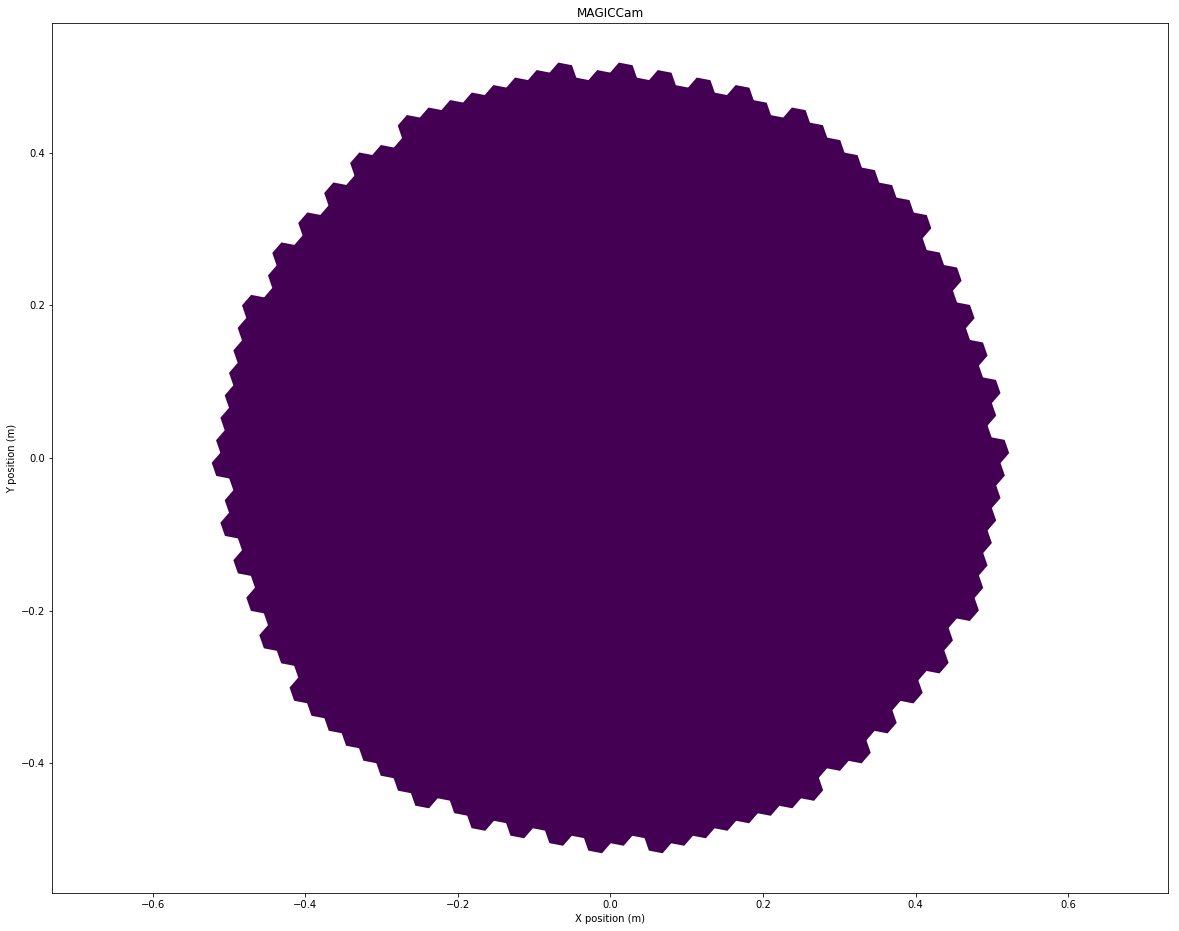

In [19]:
import numpy as np
from astropy.io import fits
import astropy.units as u
f = open('./magic_camera_info.txt', 'r')

x=[]
y=[]
j=[]
A=[]
for line in f:
    line = line.strip()
    columns = line.split()
    j.append(int(columns[0]))
    x.append(float(columns[1]))
    y.append(float(columns[2]))
    A.append(float(columns[3]))

angle = 19.1 #.11460397105

x1 = np.array(x)
y1 = np.array(y)

A = 7.79422851562500000e+02*1.0e-6 
#x = x/1.0e-3
#y=  y/1.0e-3
Area=np.repeat(A, 1039)
#print(y)
f.close()

#for i in range(100):
#    print(x2[i],y2[i])

header= fits.Header()


c1 = fits.Column(name='pix_id', array=np.array(j),  format='K')
c2 = fits.Column(name='pix_x', array=np.array(x1)*1.0e-3, unit='m', format='D')
c3 = fits.Column(name='pix_y', array=np.array(y1)*1.0e-3, unit='m', format='D')
c4 = fits.Column(name='pix_area', array=np.array(Area), unit='m^2', format='D')
t = fits.BinTableHDU.from_columns([c1, c2, c3, c4])

t.header['PIX_TYPE'] = 'hexagonal'
t.header['CAM_ID'] = 'MAGICCam'
t.header['CAM_ROT'] = 0.0
t.header['PIX_ROT'] = +angle

t.writeto('MAGICCam_1.camgeom.fits',clobber=True)

plt.figure(figsize=(20,16))
camgeom = CameraGeometry.from_name("MAGICCam_1")
disp = CameraDisplay(camgeom)
disp.show()

# STEP 2
**(MAGIC Camera information changing the frame of reference to HESS.)**

In the HESS reference frame following transfomation should be given

xHess = -yMagic

yHess = -xMagic


As we know that an angle of rotation +19.1 should be given to all pixels to make the proper allignment of 
the pixels, we should provide the angle accordingly in the HESS frame. In the HESS frame the pixel 
rotation is not just simply 19.1 deg,  it is **90-19.1** deg. We give the rotation of pixels through
**ctapipe** 

Once can manually give the pixel rotation using angle **-(90.0-19.1)** and then the result will be 
the same. 

The camera geometry file produced by this transformation should be used while using for ctapipe.

/photon1/users/labsaha/miniconda/envs/cta-dev/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


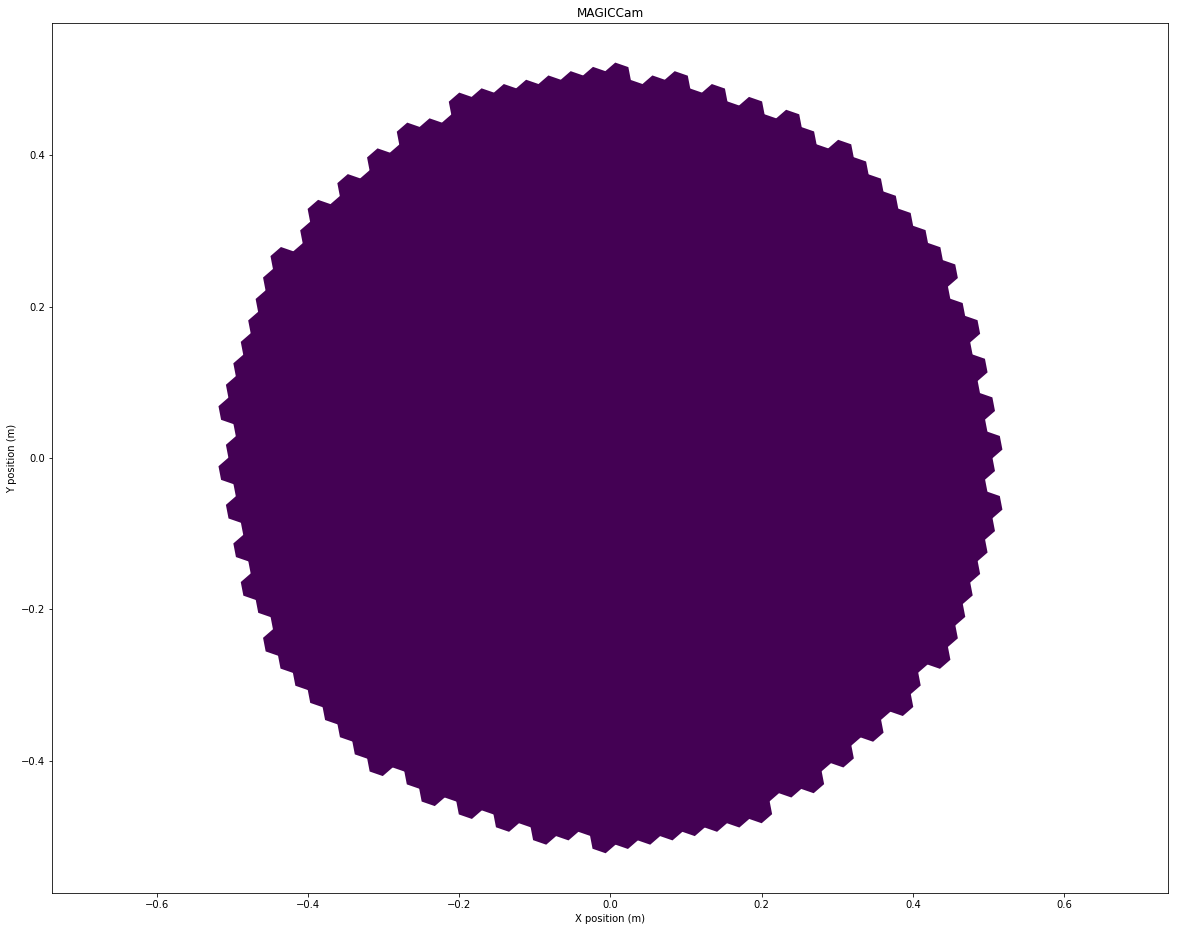

In [7]:
import numpy as np
from astropy.io import fits
import astropy.units as u
f = open('./magic_camera_info.txt', 'r')

x=[]
y=[]
j=[]
A=[]
for line in f:
    line = line.strip()
    columns = line.split()
    j.append(int(columns[0]))
    x.append(float(columns[1]))
    y.append(float(columns[2]))
    A.append(float(columns[3]))

angle = 19.1 #.11460397105

x1 = np.array(x)
y1 = np.array(y)




xMagic2Hess = -y1
yMagic2Hess = -x1

#x2 = -y1
#y2 = -x1

#x3 = np.cos(+angle*u.deg)*x2 - np.sin(+angle*u.deg)*y2
#y3 = np.cos(+angle*u.deg)*y2 + np.sin(+angle*u.deg)*x2


A = 7.79422851562500000e+02*1.0e-6 
#x = x/1.0e-3
#y=  y/1.0e-3
Area=np.repeat(A, 1039)
#print(y)
f.close()

#for i in range(100):
#    print(x2[i],y2[i])

header= fits.Header()


c1 = fits.Column(name='pix_id', array=np.array(j),  format='K')
c2 = fits.Column(name='pix_x', array=np.array(xMagic2Hess)*1.0e-3, unit='m', format='D')
c3 = fits.Column(name='pix_y', array=np.array(yMagic2Hess)*1.0e-3, unit='m', format='D')
#c2 = fits.Column(name='pix_x', array=np.array(x3)*1.0e-3, unit='m', format='D')
#c3 = fits.Column(name='pix_y', array=np.array(y3)*1.0e-3, unit='m', format='D')
c4 = fits.Column(name='pix_area', array=np.array(Area), unit='m^2', format='D')
c4 = fits.Column(name='pix_area', array=np.array(Area), unit='m^2', format='D')
t = fits.BinTableHDU.from_columns([c1, c2, c3, c4])

t.header['PIX_TYPE'] = 'hexagonal'
t.header['CAM_ID'] = 'MAGICCam'
t.header['CAM_ROT'] = 0.0
t.header['PIX_ROT'] = 90.0-angle

t.writeto('MAGICCam_2.camgeom.fits',clobber=True)

plt.figure(figsize=(20,16))
camgeom = CameraGeometry.from_name("MAGICCam_2")
disp = CameraDisplay(camgeom)
disp.show()